## Loading Libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import date
import mysql.connector

In [2]:
from IPython.core.interactiveshell import InteractiveShell         
InteractiveShell.ast_node_interactivity = "all"

In [3]:
## connecting with the database
connect = mysql.connector.connect(host='localhost',user='root',password='MySQL@123',database='car_data')
crsr = connect.cursor()

crsr.execute('Select * from car_data')
data=pd.DataFrame(crsr.fetchall())

## getting column names
crsr.execute("select column_name from information_schema.columns where table_schema='car_data' and table_name='car_data' order by ordinal_position")
a=crsr.fetchall()

col = []

for x in a:
    col.append(x[0])

## disconnecting with the database
crsr.close()
    
data.columns=col
data.head()

True

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape
# 301 observation with 9 attributes

(301, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_Name       301 non-null    object
 1   Year           301 non-null    int64 
 2   Selling_Price  301 non-null    object
 3   Present_Price  301 non-null    object
 4   Kms_Driven     301 non-null    int64 
 5   Fuel_Type      301 non-null    object
 6   Seller_Type    301 non-null    object
 7   Transmission   301 non-null    object
 8   Owner          301 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 21.3+ KB


In [6]:
data.describe()

,Year,Kms_Driven,Owner
count,301.000000,301.000000,301.000000
mean,2013.627907,36947.205980,0.043189
std,2.891554,38886.883882,0.247915
min,2003.000000,500.000000,0.000000
25%,2012.000000,15000.000000,0.000000
50%,2014.000000,32000.000000,0.000000
75%,2016.000000,48767.000000,0.000000
max,2018.000000,500000.000000,3.000000


## Pearson Correlation

<Figure size 1224x648 with 0 Axes>

<AxesSubplot:>

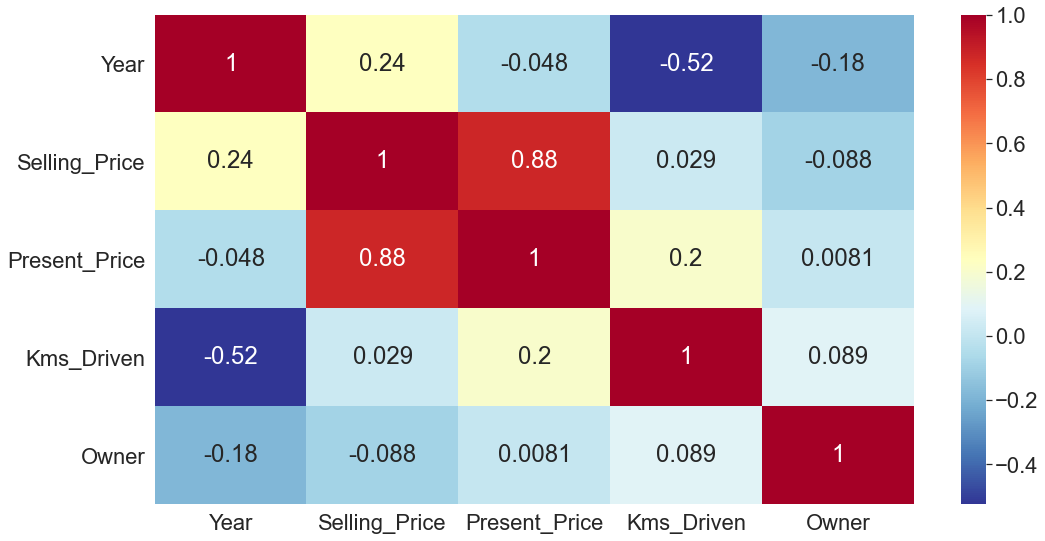

In [8]:
plt.figure(figsize=(17,9))
sns.heatmap(data.corr(),cmap=plt.cm.RdYlBu_r,annot=True)
sns.set(font_scale=2)

## Finding Missing Values

In [9]:
msng=data.isnull().sum()
prcnt=(msng/len(data))*100
pd.concat([msng,prcnt], keys=['Missing values','Missing Percent'],axis=1)
# No value is missing

,Missing values,Missing Percent
Car_Name,0,0.0
Year,0,0.0
Selling_Price,0,0.0
Present_Price,0,0.0
Kms_Driven,0,0.0
Fuel_Type,0,0.0
Seller_Type,0,0.0
Transmission,0,0.0
Owner,0,0.0


## Splitting data into train and test

In [10]:
# Let's Split data into train and test
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=0.2,shuffle=True,stratify=data['Fuel_Type'])

In [11]:
X_train=train.drop(['Selling_Price'],axis=1)
Y_train=train['Selling_Price']
X_test=test.drop(['Selling_Price'],axis=1)
Y_test=test['Selling_Price']

print('Shape of X_train: ',X_train.shape)
print('Length of Y_train: ',len(Y_train))
print('Shape of X_test: ',X_test.shape)
print('Shape of Y_test: ',len(Y_test))

Shape of X_train:  (240, 8)
Length of Y_train:  240
Shape of X_test:  (61, 8)
Shape of Y_test:  61


## Exploratory Data Analysis

In [12]:
## Finding unique lables of categorical feature

print('Unique Lables in Transmission: ',X_train['Transmission'].unique())
print('Unique Lables in Seller_Type: ',X_train['Seller_Type'].unique())
print('Unique Lables in Fuel_Type: ',X_train['Fuel_Type'].unique())

Unique Lables in Transmission:  ['Automatic' 'Manual']
Unique Lables in Seller_Type:  ['Individual' 'Dealer']
Unique Lables in Fuel_Type:  ['Petrol' 'Diesel' 'CNG']


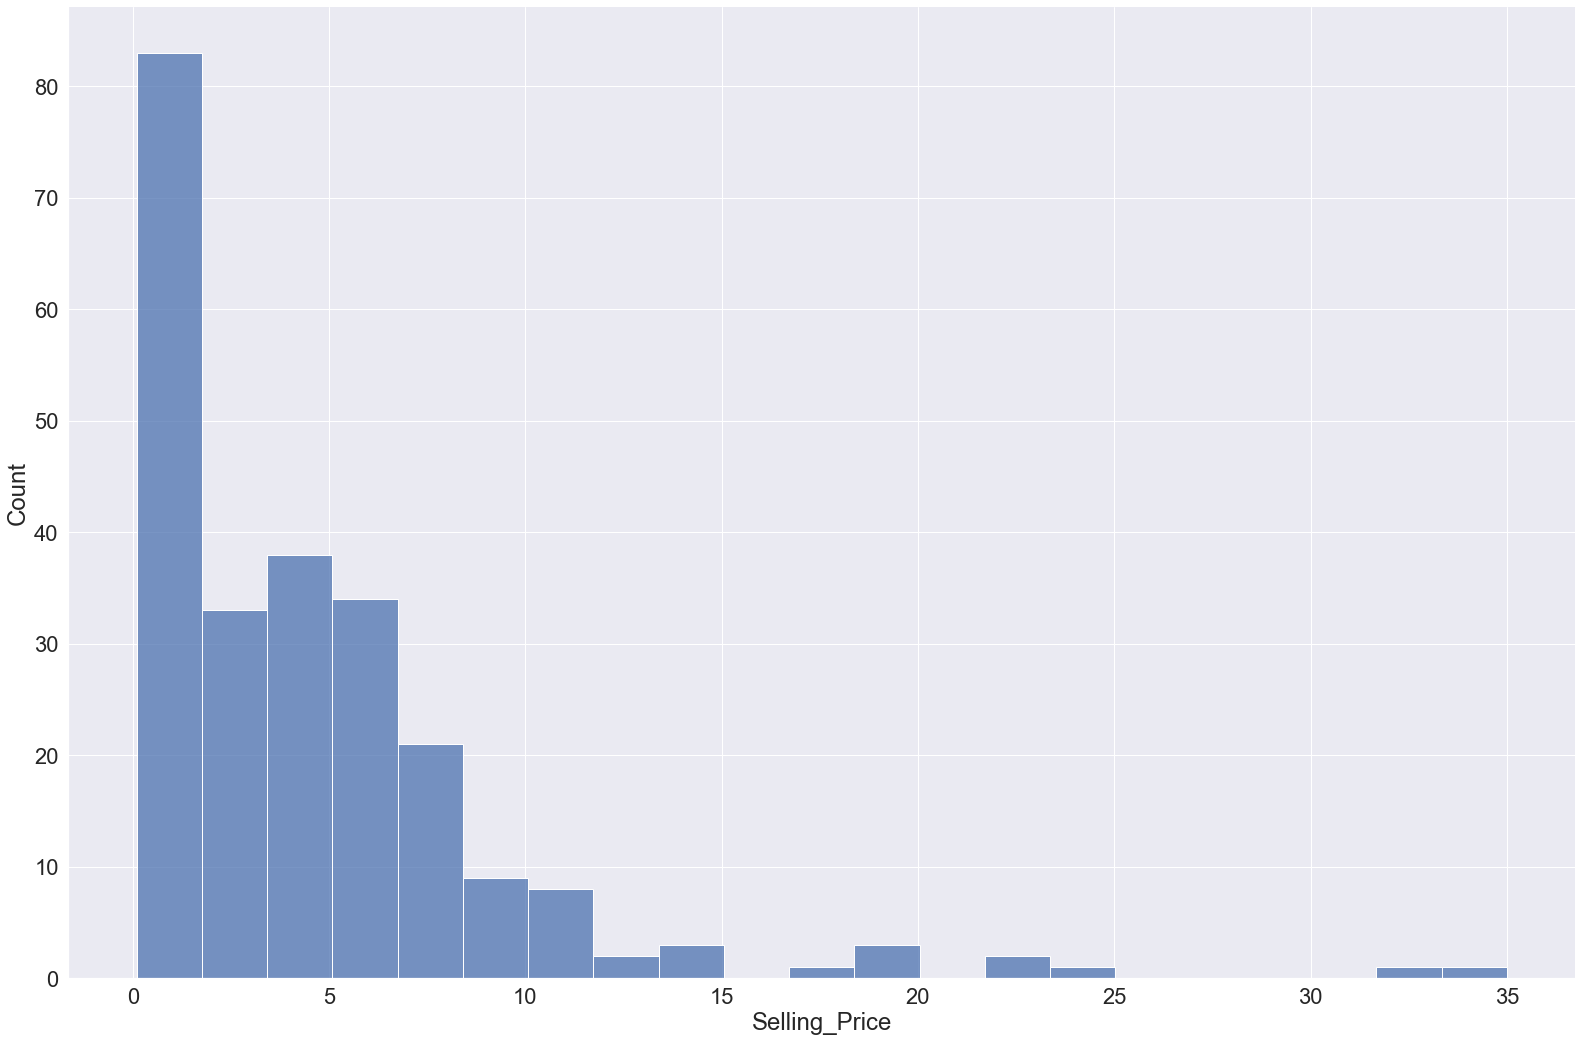

In [13]:
sns.displot(Y_train,height=15,aspect=1.5) # selling_price is rigt skewed

<Figure size 1224x648 with 0 Axes>

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

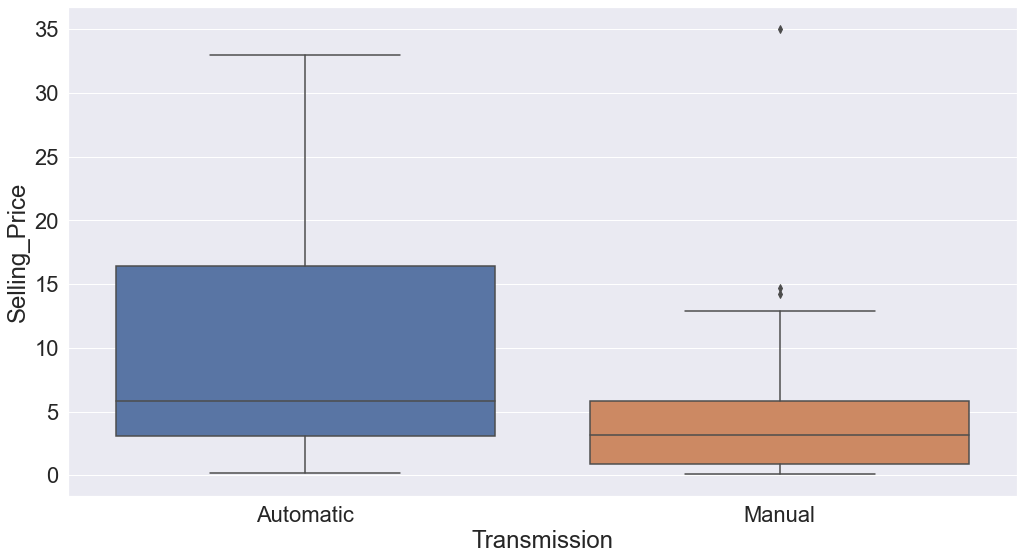

In [14]:
plt.figure(figsize=(17,9))
sns.boxplot(x=X_train['Transmission'],y=Y_train)

<Figure size 1224x648 with 0 Axes>

<AxesSubplot:xlabel='Kms_Driven', ylabel='Selling_Price'>

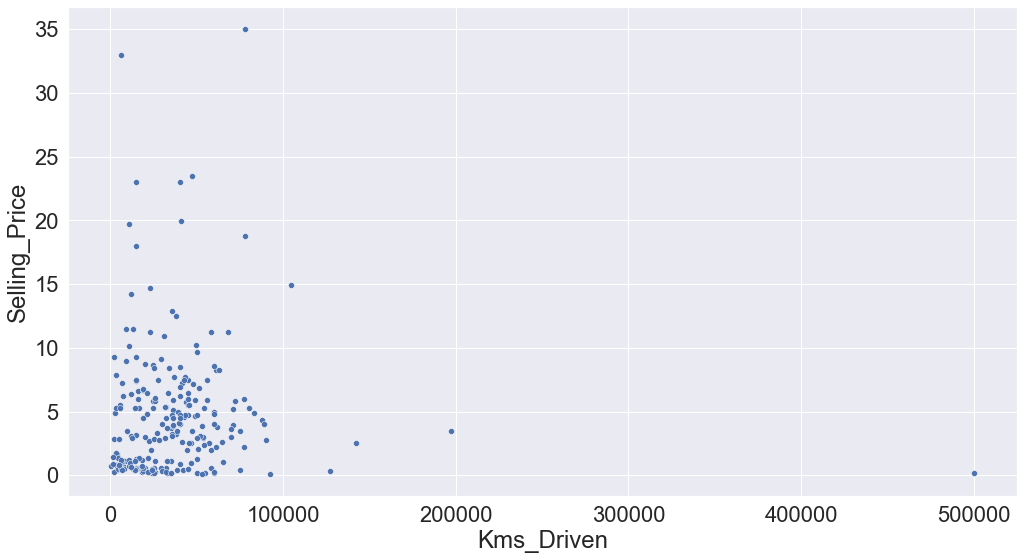

In [15]:
plt.figure(figsize=(17,9))
sns.scatterplot(x=X_train['Kms_Driven'],y=Y_train)

<Figure size 1224x648 with 0 Axes>

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

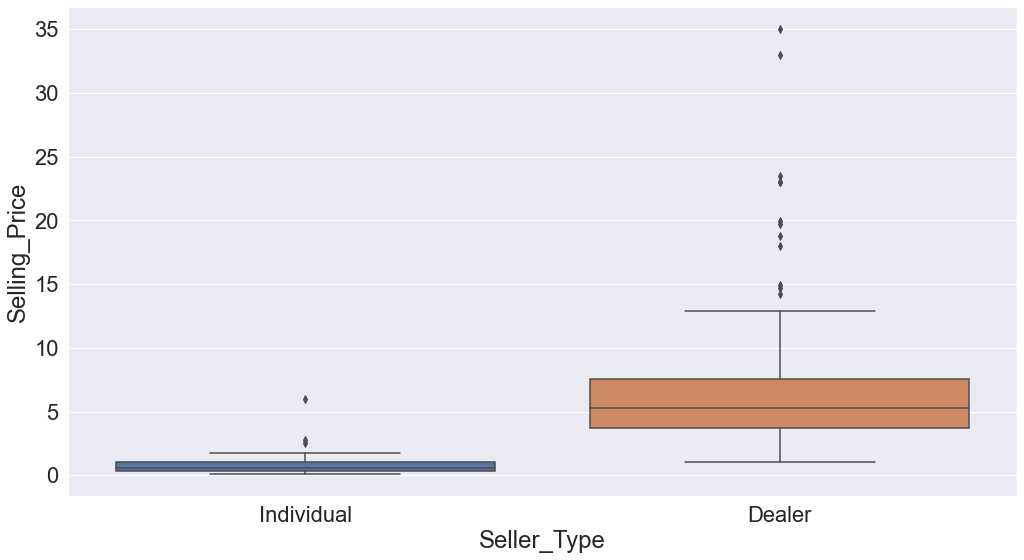

In [16]:
plt.figure(figsize=(17,9))
sns.boxplot(x=X_train['Seller_Type'],y=Y_train)

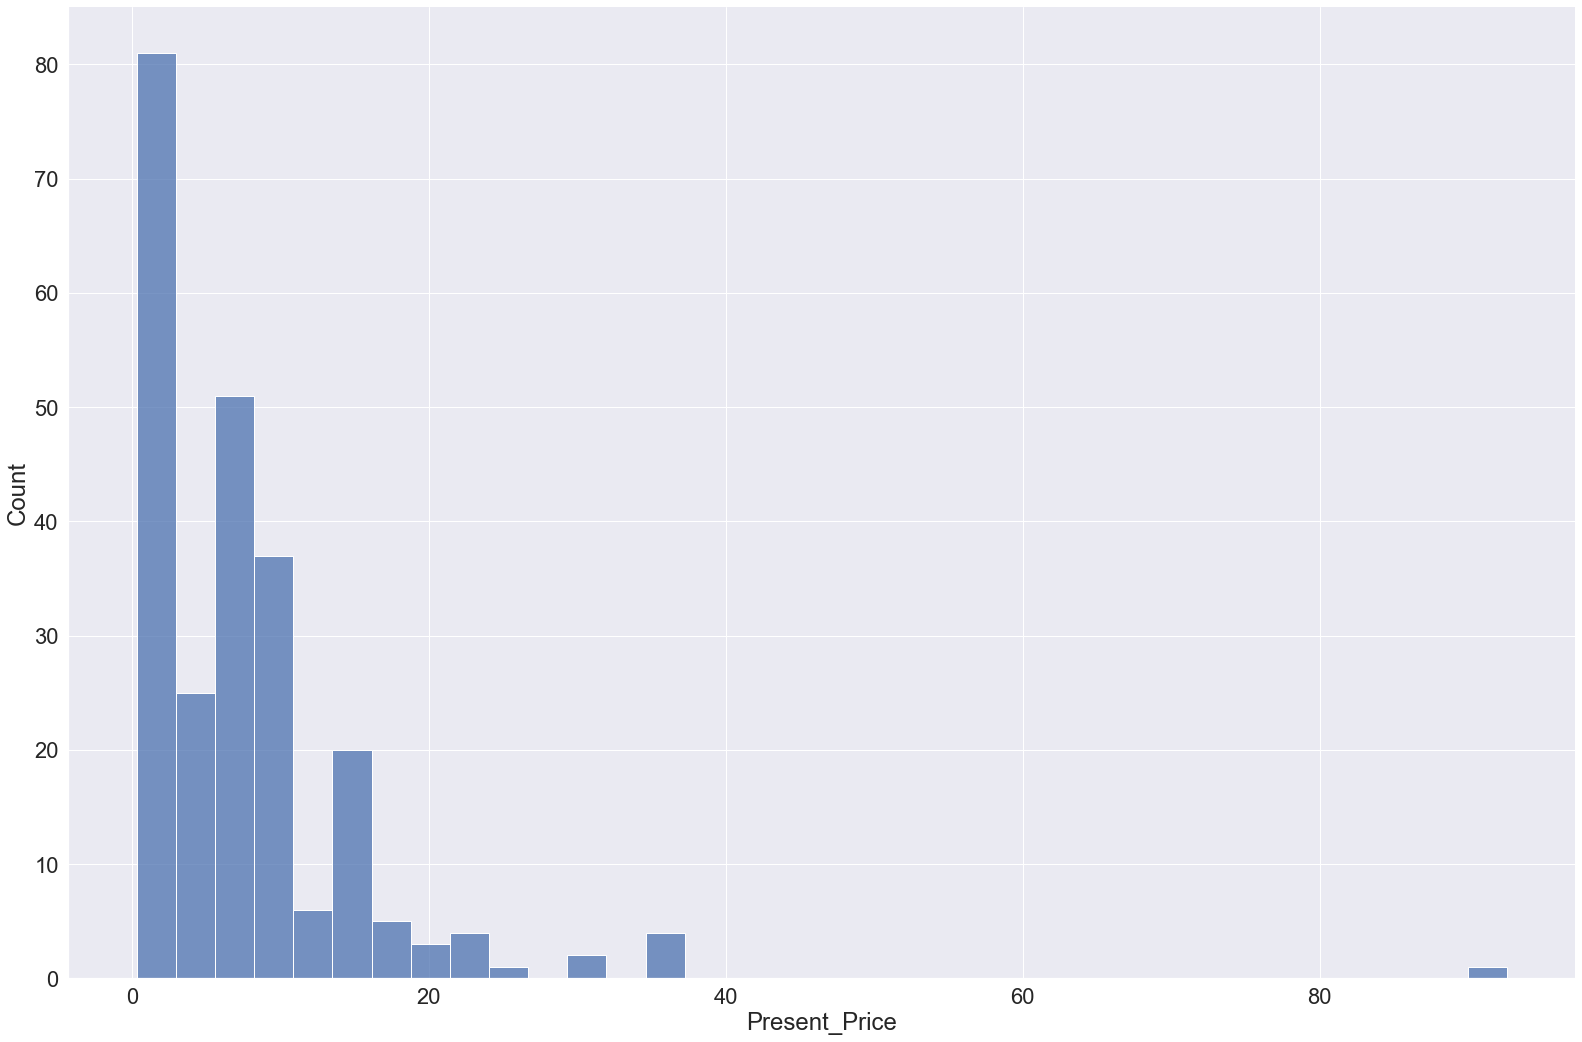

In [17]:
sns.displot(X_train['Present_Price'],height=15,aspect=1.5) # Present price is right skewed

<Figure size 1224x648 with 0 Axes>

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

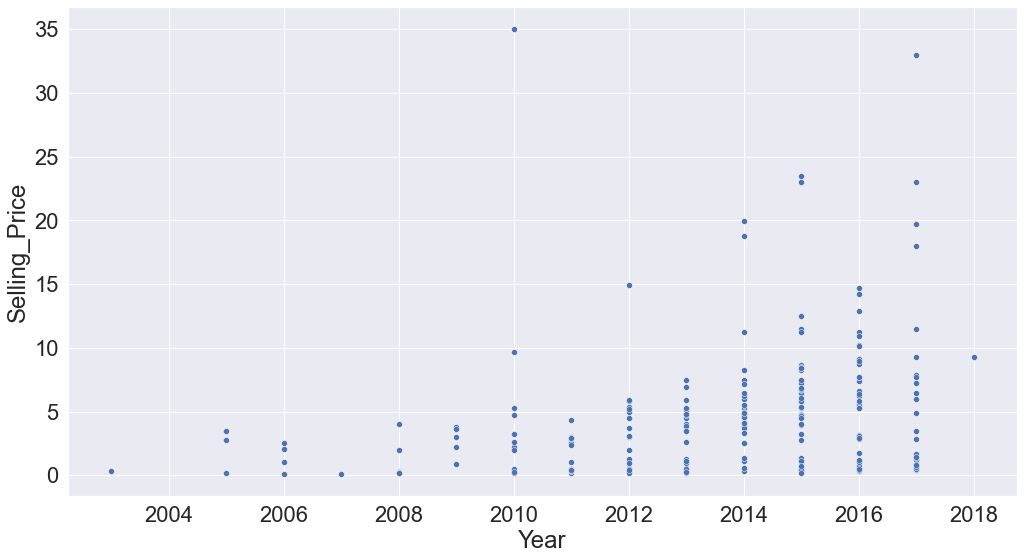

In [18]:
plt.figure(figsize=(17,9))
sns.scatterplot(x=X_train['Year'],y=Y_train)

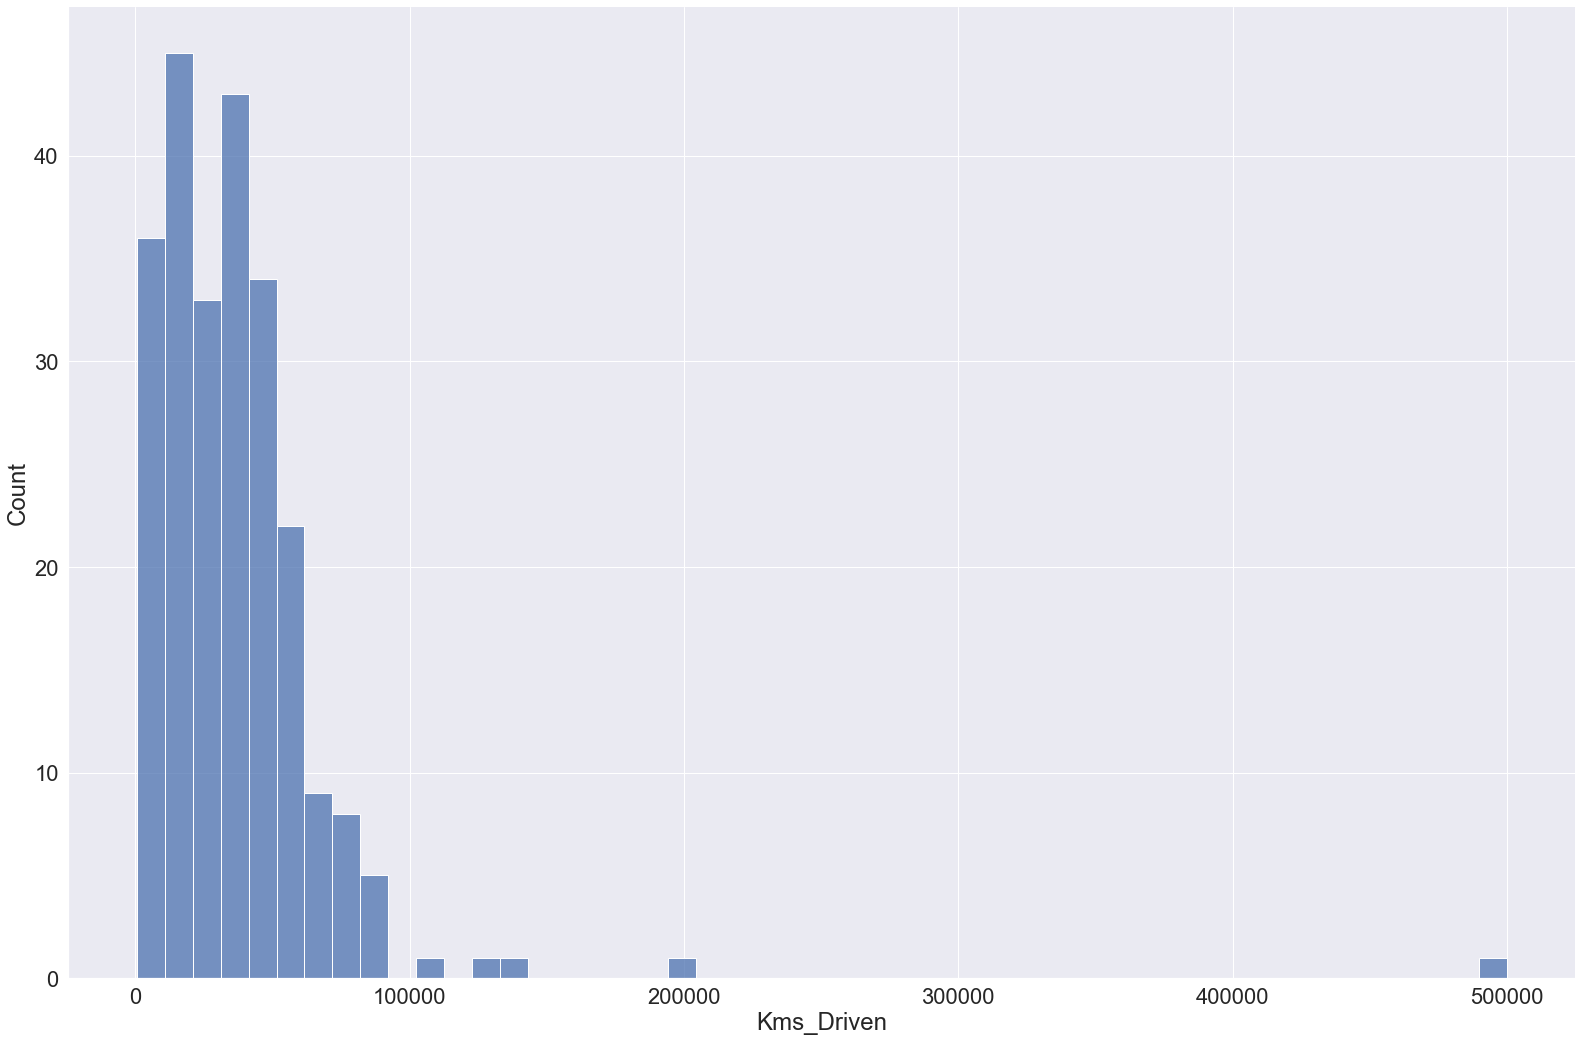

In [19]:
sns.displot(X_train['Kms_Driven'],height=15,aspect=1.5) # Kms_Driven is also right skewed

<Figure size 1224x648 with 0 Axes>

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

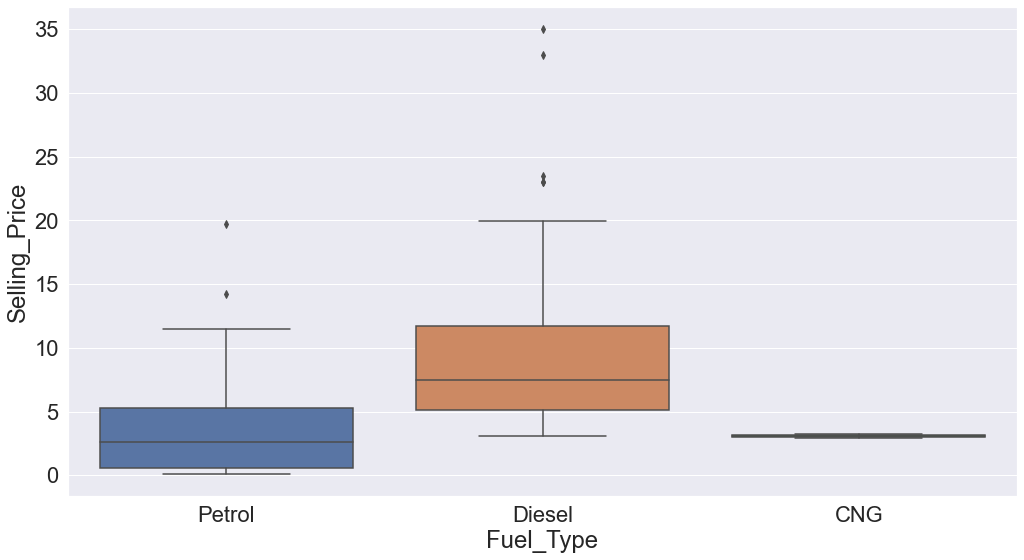

In [20]:
plt.figure(figsize=(17,9))
sns.boxplot(x=X_train['Fuel_Type'],y=Y_train)

<Figure size 1224x648 with 0 Axes>

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

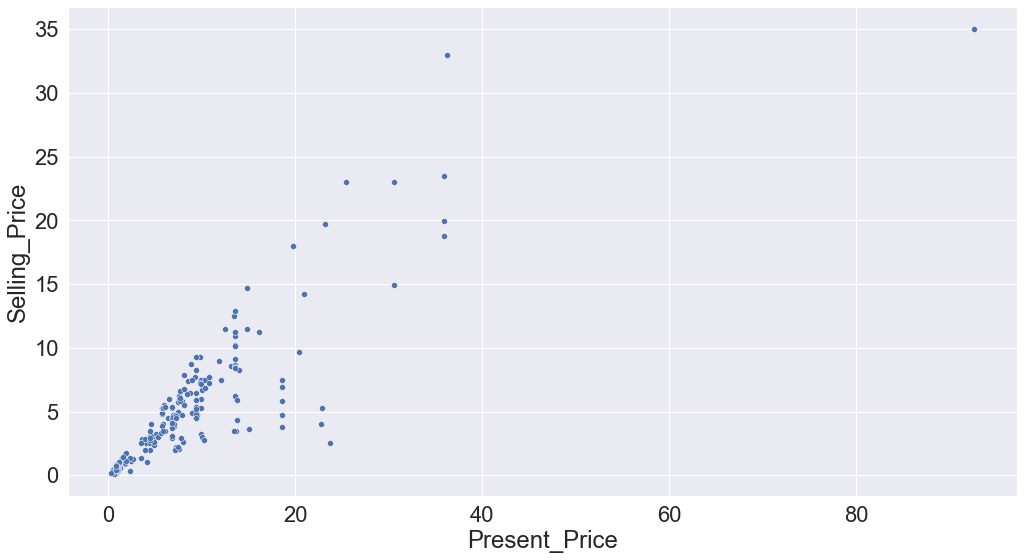

In [21]:
plt.figure(figsize=(17,9))
sns.scatterplot(x=X_train['Present_Price'],y=Y_train)

<Figure size 1224x648 with 0 Axes>

<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

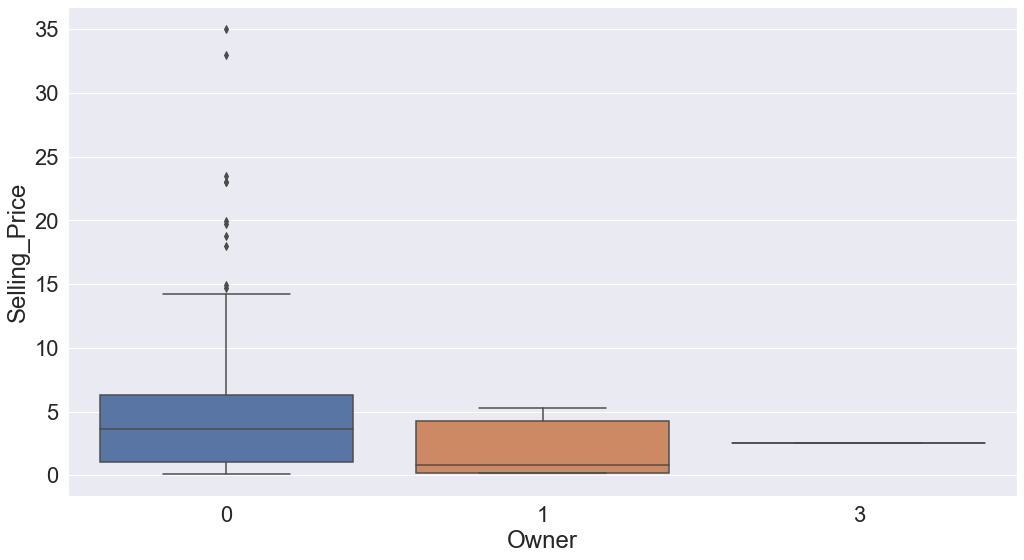

In [22]:
plt.figure(figsize=(17,9))
sns.boxplot(x=X_train['Owner'],y=Y_train)

## Pre-Processing on X_train

In [23]:
# Car name will not help in deciding selling price.
X_train.drop(['Car_Name'],axis=1,inplace=True)

In [24]:
## Instead of purchase year, we can find how old the car is by substracting it from current year
X_train['Total_years']=date.today().year-X_train['Year']

In [25]:
# Feature Year is of no use now and can be removed
X_train.drop(['Year'],axis=1,inplace=True)

## Label Encoding Using One-Hot Encoding

In [26]:
# As there are only 2 or 3 labels, it's better to go with One-Hot Encoding
X_train=pd.get_dummies(X_train,drop_first=True)
X_train.head()

,Present_Price,Kms_Driven,Owner,Total_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
85,23.73,142000,3,15,0,1,1,0
159,0.51,4000,0,4,0,1,1,0
243,7.60,7000,0,5,0,1,0,1
90,18.61,62000,0,12,0,1,0,1
193,0.65,24000,1,8,0,1,1,1


## Training Using Random Forest

In [27]:
# As we have seen before, log of selling_price is close to normal distribution.
Y_train_log=np.log(Y_train)

In [28]:
from sklearn.ensemble import RandomForestRegressor
rdfr=RandomForestRegressor()

In [29]:
rdfr.fit(X_train,Y_train)

RandomForestRegressor()

## On train

In [30]:
rdf_trn_prd=rdfr.predict(X_train)

In [31]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error for Random Forest on train: ',mean_squared_error(Y_train,rdf_trn_prd))

Mean Squared Error for Random Forest on train:  0.36064639937500037


## Pre-processing & Prediction on test data

In [32]:
X_test.drop(['Car_Name'],axis=1,inplace=True)
X_test['Total_years']=date.today().year-X_test['Year']
X_test.drop(['Year'],axis=1,inplace=True)

In [33]:
X_test=pd.get_dummies(X_test,drop_first=True)
X_test.head()

,Present_Price,Kms_Driven,Owner,Total_years,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
286,7.90,28569,0,5,1,0,1
77,12.35,135154,0,17,1,0,0
96,25.39,29000,0,5,0,0,0
202,5.70,28200,0,6,1,0,1
234,5.70,4492,0,6,1,0,1


In [34]:
# Fuel_Type_Diesel column is missing in test data. Adding column Fuel_Type_Diesel.
X_test.insert(loc=4,column='Fuel_Type_Diesel',value=0)
X_test.head()

,Present_Price,Kms_Driven,Owner,Total_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
286,7.90,28569,0,5,0,1,0,1
77,12.35,135154,0,17,0,1,0,0
96,25.39,29000,0,5,0,0,0,0
202,5.70,28200,0,6,0,1,0,1
234,5.70,4492,0,6,0,1,0,1


In [35]:
rdf_tst_prd=rdfr.predict(X_test)

In [36]:
print('Mean Squared Error for Random Forest on test: ',mean_squared_error(Y_test,rdf_tst_prd))

Mean Squared Error for Random Forest on test:  0.6981998900000026


## Hyperparameter Tuning for Random Forest

In [36]:
rf_param={'n_estimators':[150,200,250,300,350,400],
          'max_depth':[5,6,7,8],
          'min_samples_split':[2,3,4,5,6,7,8,9,10],
          'min_samples_leaf':[2,3,4,5,6,7,8,9,10],
          'max_features':[5,6,7,8]}

In [37]:
from sklearn.model_selection import GridSearchCV

RF_Grid=GridSearchCV(estimator=RandomForestRegressor(),
                     param_grid=rf_param,
                     scoring='neg_mean_squared_error',
                     n_jobs=-1,
                     cv=5,
                     verbose=1)

In [38]:
RF_Grid.fit(X_train,Y_train)

Fitting 5 folds for each of 7776 candidates, totalling 38880 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8],
                         'max_features': [5, 6, 7, 8],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [150, 200, 250, 300, 350, 400]},
             scoring='neg_mean_squared_error', verbose=1)

In [39]:
RF_Grid.best_estimator_

RandomForestRegressor(max_depth=8, max_features=8, min_samples_leaf=2,
                      min_samples_split=4, n_estimators=150)

In [40]:
RF_bst=RandomForestRegressor(n_estimators=150,
                             max_depth=8,
                             max_features=8,
                             min_samples_leaf=2,
                             min_samples_split=4)

In [41]:
RF_bst.fit(X_train,Y_train)

RandomForestRegressor(max_depth=8, max_features=8, min_samples_leaf=2,
                      min_samples_split=4, n_estimators=150)

## On train

In [42]:
RF_bst_prd=RF_bst.predict(X_train)

In [43]:
print('Mean Squared Error of RF on train: ',mean_squared_error(Y_train,RF_bst_prd))

Mean Squared Error of RF on train:  0.959090224129419


## On test

In [44]:
RF_bst_trn=RF_bst.predict(X_test)

In [45]:
print('Mean Squared Error of RF on test: ',mean_squared_error(Y_test,RF_bst_trn))

Mean Squared Error of RF on test:  1.0843353888103189


# XGBoost

In [46]:
from xgboost import XGBRegressor
xgb=XGBRegressor()

In [47]:
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## On train

In [48]:
xgb_trn_prd=xgb.predict(X_train)

In [49]:
print('Mean Squared Error for XGBoost with default parameters on train: ',mean_squared_error(Y_train,xgb_trn_prd))

Mean Squared Error for XGBoost with default parameters on train:  0.0001308786597202343


## On test

In [50]:
xgb_tst_prd=xgb.predict(X_test)

In [51]:
print('Mean Squared Error for XGBoost with default parameters on test: ',mean_squared_error(Y_test,xgb_tst_prd))

Mean Squared Error for XGBoost with default parameters on test:  0.7340251273771613


## Hyperparameter Tuning for XGBoost

In [52]:
xgb_param={'n_estimators':[200,250,300,350,400,450,500,550,600],
           'max_depth':[2,3,4,5,6,7,8],
           'learning_rate':[0.005,0.01,0.02,0.03,0.04,0.05],
           'colsample_bytree':[0.7,0.8,0.9,1]}

In [53]:
xgb_grid=GridSearchCV(estimator=XGBRegressor(tree_method='gpu_hist'),
                      param_grid=xgb_param,
                      scoring='neg_mean_squared_error',
                      verbose=1,
                      cv=10)

In [54]:
xgb_grid.fit(X_train,Y_train)

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method='gpu_hist',
         

In [55]:
xgb_grid.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.04,
 'max_depth': 4,
 'n_estimators': 550}

In [56]:
xgb_bst=XGBRegressor(n_estimators=550,
                     learning_rate=0.04,
                     max_depth=4,
                     colsample_bytree=1,
                     tree_method='gpu_hist')

In [57]:
xgb_bst.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.04, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=550, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

## On train

In [58]:
xgb_bst_trn_prd=xgb_bst.predict(X_train)

In [59]:
print('Mean Squared Error for XGBoost after HPT on train: ',mean_squared_error(Y_train,xgb_bst_trn_prd))

Mean Squared Error for XGBoost after HPT on train:  0.016711078338218395


## On test

In [60]:
xgb_bst_tst_prd=xgb_bst.predict(X_test)

In [61]:
print('Mean Squared Error for XGBoost after HPT on test: ',mean_squared_error(Y_test,xgb_bst_tst_prd))

Mean Squared Error for XGBoost after HPT on test:  1.0164655908400833


## Linear Regression

Linear Regression is a distance based algorithm and hense all the features to be used for prediction needs to be re-scaled. From EDA, we know that none of the data follows gausian distribution, so normalisation should be used for rescaling the features.

In [62]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()
norm.fit(X_train)

Normalizer()

In [63]:
X_train_lr=norm.transform(X_train)

In [64]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [65]:
lr.fit(X_train_lr,Y_train)

LinearRegression()

## On train

In [66]:
lr_trn_prd=lr.predict(X_train_lr)

In [67]:
print('Mean Squared Error of Linear Regression with default parameters on train: ',mean_squared_error(Y_train,lr_trn_prd))

Mean Squared Error of Linear Regression with default parameters on train:  12.085905381618243


## On test

#### Rescaling test data

In [68]:
X_test_lr=norm.transform(X_test)

In [69]:
lr_tst_prd=lr.predict(X_test_lr)

In [70]:
print('Mean Squared Error of Liner Regression with defaul parameters on test: ',mean_squared_error(Y_test,lr_tst_prd))

Mean Squared Error of Liner Regression with defaul parameters on test:  11.725020838975865


l1 and l2 parameters can be used to avoid overfitting. But MSE of 10.05 on train signifyies that there isn't a problem of overfitting but instead underfitting. Hence, a linear regression with l1 and l2 parameters isn't created.

## Conclusion

* Random Forest - Random Forest with its default parameter gives Mean Squeared Error of 0.86 on test data. After Hyperparameter tuning, MSE obtained is 1.02. We can say default parameters works best for Random Forest.


* XGBoost - XGBoost with its default parameter gives MSE of 0.72 on test data with default parameters. After hyperparameter tuning, MSE reduces to 0.69


* Linear Regression - LR gives an MSE error of 24.21 in test data without using l1 nnd l2 parameters. Also, LR gives MSE of 10.80 on train data by which we can say the model is under fitted hence using l1 and l2 parameters is of no use.

Out of the three algorithm which are used, XGBoost gives us the best result on test data after Hyperparameter Tuning and will be used for deployment.

In [71]:
import pickle
pickle.dump(xgb_bst,open('XGBoost.pkl','wb'))